<a href="https://colab.research.google.com/github/conceptbin/dipstick/blob/master/Dipstick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#User input
Enter user variables in this section, then run all cells:

In [1]:
search_term = "Roehampton"
limit = 1000 #If you're just testing the search, set a smaller limit.

#Search and save to pandas dataframe

In [2]:
#Install Twint for Twitter search
!pip3 install twint

     |████████████████████████████████| 1.2MB 5.3MB/s 
     |████████████████████████████████| 245kB 10.5MB/s 
     |████████████████████████████████| 194kB 13.6MB/s 
     |████████████████████████████████| 153kB 16.4MB/s 
     |████████████████████████████████| 256kB 15.1MB/s 
     |████████████████████████████████| 235kB 16.0MB/s 
  Created wheel for twint: filename=twint-2.1.20-cp36-none-any.whl size=33921 sha256=a55ecd9aed3265ded163405e6b7a04bef016b53d8c6b0fef61949e974a828315
  Stored in directory: /root/.cache/pip/wheels/66/25/c7/855c1d896087ef84df6e6713b8adb073aff99af119450e1e4f
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=587db56f8b7b8d0b4cfce035d73022596a71eadc8a4cef61902053795f19a583
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp36-none-any.whl size=15969 sha256=93306414f4982e0acba4a9b86220695359b

In [3]:
import pandas as pd
import twint

c = twint.Config()
c.Search = search_term
c.Limit = limit
#c.Min_likes = 5 #Minimum number of likes, to just get tweets people interacted with.
c.Pandas = True

twint.run.Search(c)
df = twint.storage.panda.Tweets_df

1277910496914608129 2020-06-30 10:22:59 UTC <NutritionRoe> Job advert for a Veg Advocate Support Officer and volunteering opportunities too https://twitter.com/food_foundation/status/1277889848247025664 …
1277907971150839808 2020-06-30 10:12:57 UTC <EsportsRoe> Dm'ed you as well :)
1277905367767355393 2020-06-30 10:02:36 UTC <RoehamptonUni> We will holding a Unibuddy live event this Thursday (2 July), where @EsportsRoe will be on hand to chat and answer any questions you have about Esports at Roehampton 🎮🕹️💚  Drop-in to the event any time between 4-6pm by following this link: … https://esportsatroehamptononlineevent.eventbrite.co.uk  ⬅️
1277899127389655040 2020-06-30 09:37:48 UTC <TheBARO55589532> Less parking,insufficient transport,breakup of community,traffic chaos on the whole length of Roehampton lane and its feed roads, less social housing which is who the estate was built for not to sell off to private enterprise.
1277898302479118336 2020-06-30 09:34:32 UTC <RacketsCubed> "Servin

#Basic Analysis

##User by frequency

In [4]:
most_tweets = df.groupby(['username']).size().reset_index(name='counts')
most_tweets = most_tweets.sort_values(by='counts', ascending=False)
most_tweets[:20]

,username,counts
9,AltonWatch,90
441,tonyarthur322,87
191,RoehamptonUni,45
266,UR_Library,32
106,K8Carine,27
183,RoeOutreach,21
166,PutneyFleur,16
188,RoehamptonL,14
63,EsportsRoe,13
283,_ClaireGilbert,12


##Likes

In [5]:
#Most likes
most_l = (df.nlargest(1000, 'nlikes') 
          .drop_duplicates(['tweet'])
          )
most_l = most_l.sort_values(by='nlikes', ascending=False)
most_l[:10][['date','username','tweet','nlikes']]  #Slice of list, selected columns

,date,username,tweet,nlikes
855,2020-06-07 22:59:26,InterieurUK,A large and imposing new build property 🏠 (Roe...,1229
604,2020-06-17 07:01:38,PutneyFleur,Cycling here is a pleasure - this would be gre...,505
769,2020-06-10 16:41:52,JoshMatlow,"I know art by nature is subjective, but it loo...",161
801,2020-06-09 16:19:03,AydinDikerdem,Day 1 of putting together creative packs to go...,134
94,2020-06-28 22:30:00,SkySports,Dan Evans dominated his compatriot Kyle Edmund...,130
119,2020-06-28 14:32:45,SkySports,Andy Murray has withdrawn from the third-place...,129
297,2020-06-24 21:16:52,the_LTA,#DidYouKnow @CocoGauff's 2019 @wimbledon journ...,102
478,2020-06-21 14:18:12,Tennis,.@jamie_murray's Battle of the Brits is set to...,101
671,2020-06-14 21:58:19,NigelClarkeJa,"Earlier this week, I broke ground on the impro...",87
495,2020-06-20 20:39:30,ValkovR,"Nigma walckenaeri, a female Mesh-webbed spider...",67


##Retweets

In [6]:
#Most retweeted
most_r = (df.nlargest(1000, 'nretweets') 
          .drop_duplicates(['tweet'])
          )
most_r[:10][['date','username','tweet','nretweets']]  #Slice of list, selected columns

,date,username,tweet,nretweets
855,2020-06-07 22:59:26,InterieurUK,A large and imposing new build property 🏠 (Roe...,162
604,2020-06-17 07:01:38,PutneyFleur,Cycling here is a pleasure - this would be gre...,98
692,2020-06-13 17:21:00,JeremyAmbache,I was asked why is Roehampton Playing Fields (...,29
801,2020-06-09 16:19:03,AydinDikerdem,Day 1 of putting together creative packs to go...,26
763,2020-06-11 08:37:01,writingwestmids,Submissions are now open for the Robert Graves...,22
593,2020-06-17 09:51:38,VRoehampton,Please read! This is our meticulously research...,19
478,2020-06-21 14:18:12,Tennis,.@jamie_murray's Battle of the Brits is set to...,16
495,2020-06-20 20:39:30,ValkovR,"Nigma walckenaeri, a female Mesh-webbed spider...",16
785,2020-06-10 08:28:48,BoofDaddi,Roehampton deffo one of the strangest areas yo...,15
961,2020-06-04 15:58:00,RoehamptonUni,"A message for all students, staff and members ...",14


##Overview

In [7]:
#Overview data
tweets_total = len(df)  #Total no. of tweets in the set
tweeters = len(df['username'].unique())  #No. of unique tweeters
time_from = df['date'].min()
time_to = df['date'].max()

In [8]:
#Gather overview data into a dict
report = {'What': ['Total no. of tweets:', 'No. of unique tweeters:', 'Time from:', 'Time to:'],
          'Number': [tweets_total, tweeters, time_from, time_to]}

In [9]:
#Make overview dataframe from dict and display
report_table = pd.DataFrame(report)
report_table

,What,Number
0,Total no. of tweets:,1000
1,No. of unique tweeters:,459
2,Time from:,2020-06-03 12:36:32
3,Time to:,2020-06-30 10:22:59


#Keywords, hashtags, etc.

##N-grams
Code adapted from De Dios, From Dataframe to N-Grams (Medium 22 May 2020) [link text](https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460).

In [10]:
#Import libraries 

# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [11]:
#Function for basic cleaning of the text.
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word are lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [12]:
#try out basic_clean
words = basic_clean(''.join(str(df['tweet'].tolist())))

In [13]:
#Top 10 bigrams
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(altonwatch, roehampton)    63
(battle, brit)              42
(roehampton, gate)          39
(university, roehampton)    38
(andy, murray)              33
(last, week)                28
(richmond, park)            27
(roehampton, last)          27
(back, photo)               26
(nlooking, back)            26
dtype: int64

In [14]:
#top 10 trigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(nlooking, back, photo)        26
(photo, played, roehampton)    26
(last, week, nlooking)         26
(played, roehampton, last)     26
(back, photo, played)          26
(week, nlooking, back)         26
(missed, yearly, visit)        25
(yearly, visit, wimbledon)     25
(visit, wimbledon, qualies)    25
(wimbledon, qualies, last)     25
dtype: int64

##Visualization of N-grams

In [15]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

In [16]:
bigrams_series.head()

(altonwatch, roehampton)    63
(battle, brit)              42
(roehampton, gate)          39
(university, roehampton)    38
(andy, murray)              33
dtype: int64

###Bigrams

Text(0.5, 0, '# of Occurences')

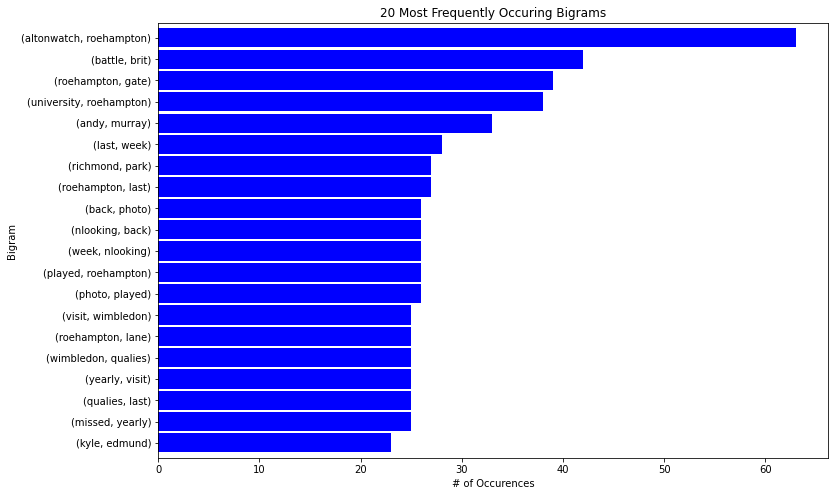

In [17]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurences')

###Trigrams

Text(0.5, 0, '# of Occurences')

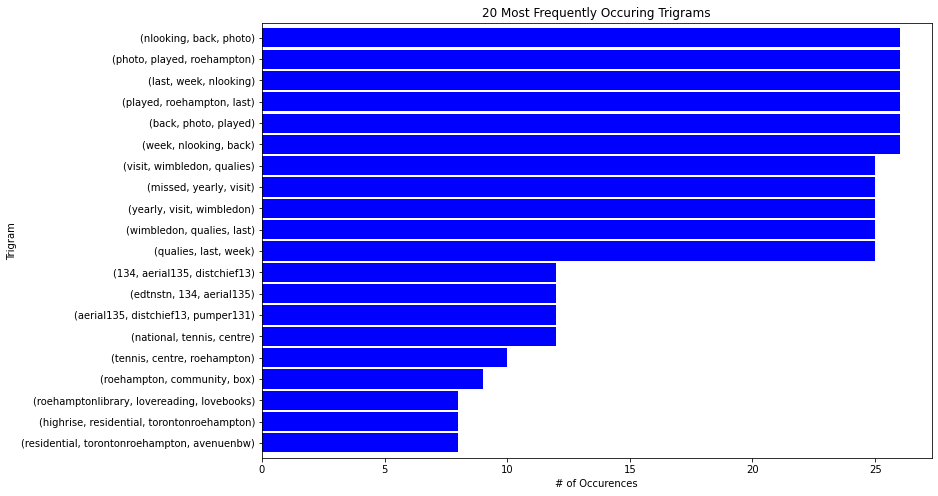

In [18]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurences')

##Hashtags

In [19]:
def tag_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  #stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words]

In [20]:
#try out tag_clean
tags = tag_clean(''.join(str(df['hashtags'].tolist())))

In [21]:
#top hashtags
hashtags_series = (pd.Series(tags).value_counts())[:30]

##Visualization of top hashtags

Text(0.5, 0, '# of Occurences')

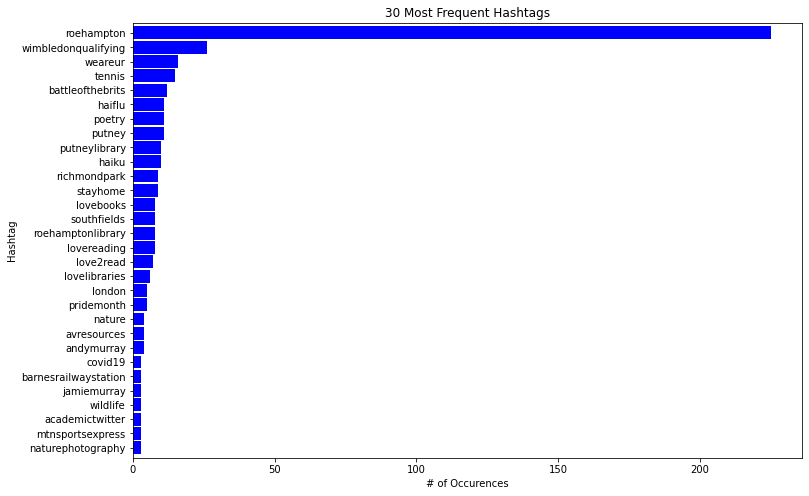

In [22]:
hashtags_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('30 Most Frequent Hashtags')
plt.ylabel('Hashtag')
plt.xlabel('# of Occurences')

# Output

In [23]:
#Save dataframes to separate sheets in an Excel workbook.
with pd.ExcelWriter('dipstick_out.xlsx') as writer:
  report_table.to_excel(writer, sheet_name='Overview report')
  most_l.to_excel(writer, sheet_name='Most likes')
  most_r.to_excel(writer, sheet_name='Most retweets')
  most_tweets.to_excel(writer, sheet_name='Most tweets by user')
  bigrams_series.to_excel(writer, sheet_name='Top bigrams (stopwords removed')
  trigrams_series.to_excel(writer, sheet_name='Top trigrams')
  hashtags_series.to_excel(writer, sheet_name='Top hashtags')
  df.to_excel(writer, sheet_name='All tweets')